# Metrics

In [43]:
# using the credit card fraud detection dataset to illustrate metrics

import numpy as np 
import pandas as pd
import matplotlib.pyplot as plt

# df = pd.read_csv("archive/creditcard.csv")[:80000]
df = pd.read_csv("~/Downloads/creditcard.csv")[:80000]

In [44]:
df.head(5)

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
0,0.0,-1.359807,-0.072781,2.536347,1.378155,-0.338321,0.462388,0.239599,0.098698,0.363787,...,-0.018307,0.277838,-0.110474,0.066928,0.128539,-0.189115,0.133558,-0.021053,149.62,0
1,0.0,1.191857,0.266151,0.166480,0.448154,0.060018,-0.082361,-0.078803,0.085102,-0.255425,...,-0.225775,-0.638672,0.101288,-0.339846,0.167170,0.125895,-0.008983,0.014724,2.69,0
2,1.0,-1.358354,-1.340163,1.773209,0.379780,-0.503198,1.800499,0.791461,0.247676,-1.514654,...,0.247998,0.771679,0.909412,-0.689281,-0.327642,-0.139097,-0.055353,-0.059752,378.66,0
3,1.0,-0.966272,-0.185226,1.792993,-0.863291,-0.010309,1.247203,0.237609,0.377436,-1.387024,...,-0.108300,0.005274,-0.190321,-1.175575,0.647376,-0.221929,0.062723,0.061458,123.50,0
4,2.0,-1.158233,0.877737,1.548718,0.403034,-0.407193,0.095921,0.592941,-0.270533,0.817739,...,-0.009431,0.798278,-0.137458,0.141267,-0.206010,0.502292,0.219422,0.215153,69.99,0


In [4]:
X = df.drop(columns=["Time", "Amount", "Class"]).values

y = df["Class"].values

print(f"Shape of X = {X.shape}, shape of y = {y.shape}, #Fraud cases = {np.sum(y)}")

Shape of X = (80000, 28), shape of y = (80000,), #Fraud cases = 196


In [5]:
print(type(X),type(df))

# so slicing a df create a numpy array, not a dataframe again!

<class 'numpy.ndarray'> <class 'pandas.core.frame.DataFrame'>


In [6]:
df.describe()

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
count,80000.000000,80000.000000,80000.000000,80000.000000,80000.000000,80000.000000,80000.000000,80000.000000,80000.000000,80000.000000,...,80000.000000,80000.000000,80000.000000,80000.000000,80000.000000,80000.000000,80000.000000,80000.000000,80000.000000,80000.000000
mean,37332.183588,-0.258086,-0.036364,0.678340,0.163600,-0.276254,0.095376,-0.114390,0.053252,-0.010000,...,-0.029000,-0.105751,-0.037651,0.007894,0.134427,0.026336,0.002025,0.002570,97.775498,0.002450
std,15209.718131,1.888947,1.679465,1.386402,1.368678,1.382928,1.305057,1.247498,1.233289,1.144390,...,0.739825,0.636423,0.628525,0.595679,0.440853,0.498120,0.390666,0.331055,269.180362,0.049437
min,0.000000,-56.407510,-72.715728,-33.680984,-5.172595,-42.147898,-26.160506,-31.764946,-73.216718,-9.283925,...,-34.830382,-10.933144,-26.751119,-2.836627,-7.495741,-2.534330,-9.390980,-9.617915,0.000000,0.000000
25%,30718.500000,-1.019388,-0.599350,0.186697,-0.725926,-0.894690,-0.642417,-0.604450,-0.141200,-0.686546,...,-0.224356,-0.524838,-0.178315,-0.322913,-0.129354,-0.326741,-0.063341,-0.005819,7.680000,0.000000
50%,40052.000000,-0.250144,0.069013,0.765189,0.182134,-0.309687,-0.153999,-0.073816,0.069079,-0.089189,...,-0.058577,-0.080453,-0.050284,0.064108,0.172777,-0.072778,0.009277,0.022868,26.955000,0.000000
75%,49105.000000,1.153620,0.721751,1.394244,1.043840,0.258717,0.490107,0.416536,0.349036,0.624249,...,0.117690,0.309546,0.080590,0.405444,0.421519,0.307898,0.082446,0.076056,89.205000,0.000000
max,58287.000000,1.960497,18.902453,4.226108,16.715537,34.801666,22.529298,36.677268,20.007208,10.392889,...,22.614889,10.503090,18.946734,4.014444,5.525093,3.517346,12.152401,33.847808,19656.530000,1.000000


In [15]:
from sklearn.linear_model import LogisticRegression

# logreg = LogisticRegression()

logreg = LogisticRegression(class_weight={0:1, 1:2}, max_iter=1000)

logreg.fit(X,y)
logreg.predict(X).sum()


172

In [16]:
logreg.get_params()

{'C': 1.0,
 'class_weight': {0: 1, 1: 2},
 'dual': False,
 'fit_intercept': True,
 'intercept_scaling': 1,
 'l1_ratio': None,
 'max_iter': 1000,
 'multi_class': 'deprecated',
 'n_jobs': None,
 'penalty': 'l2',
 'random_state': None,
 'solver': 'lbfgs',
 'tol': 0.0001,
 'verbose': 0,
 'warm_start': False}

So, with default class weights 151 instances of X are classified as frauds. But after introducing a 0 -> 1 and 1 -> 2 mapping, i.e. occurance of 1 is weighted twice as much, the no of fradulent transactions increases to 172, 
which is closer to the actual no = 196. 

So clearly there is scope for improvement. 

But what is our metric? and how to find optimum weight value?

Run grid search

In [17]:
from sklearn.model_selection import GridSearchCV

grid = GridSearchCV(
    estimator=LogisticRegression(max_iter=1000), 
    param_grid={'class_weight': [{0:1, 1:v} for v in range(1,4)]}, 
    cv=4
)

grid.fit(X,y)

GridSearchCV(cv=4, estimator=LogisticRegression(max_iter=1000),
             param_grid={'class_weight': [{0: 1, 1: 1}, {0: 1, 1: 2},
                                          {0: 1, 1: 3}]})

In [18]:
pd.DataFrame(grid.cv_results_)

,mean_fit_time,std_fit_time,mean_score_time,std_score_time,param_class_weight,params,split0_test_score,split1_test_score,split2_test_score,split3_test_score,mean_test_score,std_test_score,rank_test_score
0,0.077121,0.011648,0.001469,0.000541,"{0: 1, 1: 1}","{'class_weight': {0: 1, 1: 1}}",0.8431,0.99835,0.99950,0.99785,0.959700,0.067322,1
1,0.082496,0.026069,0.001537,0.000439,"{0: 1, 1: 2}","{'class_weight': {0: 1, 1: 2}}",0.8190,0.99840,0.99965,0.99805,0.953775,0.077815,2
2,0.076752,0.019690,0.002002,0.000005,"{0: 1, 1: 3}","{'class_weight': {0: 1, 1: 3}}",0.7089,0.99845,0.99960,0.99815,0.926275,0.125503,3


Now for this very basic grid, some test score are calculated; but how?

It is a direct accuracy metric - which is blasphemous on this dataset since it is highly imbalanced. (#0 vs #1s) 

So we need better metrics (precision, recall, F1), which we must define in our grid.. 

In [24]:
from sklearn.metrics import precision_score, recall_score, make_scorer

#syntax: precision_score(y_true, y_pred) where both are arrays

#recall: did i get all the fraud cases?
# precision: how many of the detected cases were actually fradulent

p = precision_score(y, grid.predict(X))

r = recall_score(y, grid.predict(X))

f"precision score = {p}, recall score = {r}"

'precision score = 0.7814569536423841, recall score = 0.6020408163265306'

So clearly the 99.7% accuracy is useless if precision and recall are low. So now we proceed to design a gridsearch to obtain different precision and recall and plot it; and finally choose which values of hyperparams suits our needs. 

In [30]:
# make_scorer is needed to convert it to a signature compatible with gridsearchCV

grid2 = GridSearchCV(
    estimator=LogisticRegression(max_iter=1000), 
    param_grid={'class_weight': [{0:1, 1:v} for v in range(1,4)]}, 
    scoring={'precision': make_scorer(precision_score), 'recall':make_scorer(recall_score)},
    refit='precision', #to rank by precision
    return_train_score=True,
    cv=4
)

grid2.fit(X,y)


GridSearchCV(cv=4, estimator=LogisticRegression(max_iter=1000),
             param_grid={'class_weight': [{0: 1, 1: 1}, {0: 1, 1: 2},
                                          {0: 1, 1: 3}]},
             refit='precision', return_train_score=True,
             scoring={'precision': make_scorer(precision_score, response_method='predict'),
                      'recall': make_scorer(recall_score, response_method='predict')})

In [31]:
pd.DataFrame(grid2.cv_results_)

,mean_fit_time,std_fit_time,mean_score_time,std_score_time,param_class_weight,params,split0_test_precision,split1_test_precision,split2_test_precision,split3_test_precision,...,split3_test_recall,mean_test_recall,std_test_recall,rank_test_recall,split0_train_recall,split1_train_recall,split2_train_recall,split3_train_recall,mean_train_recall,std_train_recall
0,0.080137,0.018955,0.006909,0.000280,"{0: 1, 1: 1}","{'class_weight': {0: 1, 1: 1}}",0.015071,1.0,0.975610,0.875000,...,0.142857,0.566327,0.342825,3,0.863946,0.585034,0.510204,0.687075,0.661565,0.132642
1,0.079484,0.013529,0.007007,0.000713,"{0: 1, 1: 2}","{'class_weight': {0: 1, 1: 2}}",0.013090,1.0,0.977273,0.857143,...,0.244898,0.612245,0.320415,2,0.870748,0.666667,0.625850,0.782313,0.736395,0.096490
2,0.078338,0.013847,0.007356,0.000764,"{0: 1, 1: 3}","{'class_weight': {0: 1, 1: 3}}",0.008179,1.0,0.955556,0.800000,...,0.326531,0.637755,0.293401,1,0.870748,0.707483,0.680272,0.816327,0.768707,0.077861


To have a more robust selection procedure, lets add more folds in cross validation, increase the range of the param_grid, and plot graphs to visualize the exact variation of precision and recall: 

In [32]:
grid3 = GridSearchCV(
    estimator=LogisticRegression(max_iter=1000), 
    param_grid={'class_weight': [{0:1, 1:v} for v in np.linspace(1,20,30)]}, # 30 steps between 1 to 20
    scoring={'precision': make_scorer(precision_score), 'recall':make_scorer(recall_score)},
    refit='precision', #to rank by precision
    return_train_score=True,
    cv=10
)

grid3.fit(X,y);


c:\Users\AN80050181\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\metrics\_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))


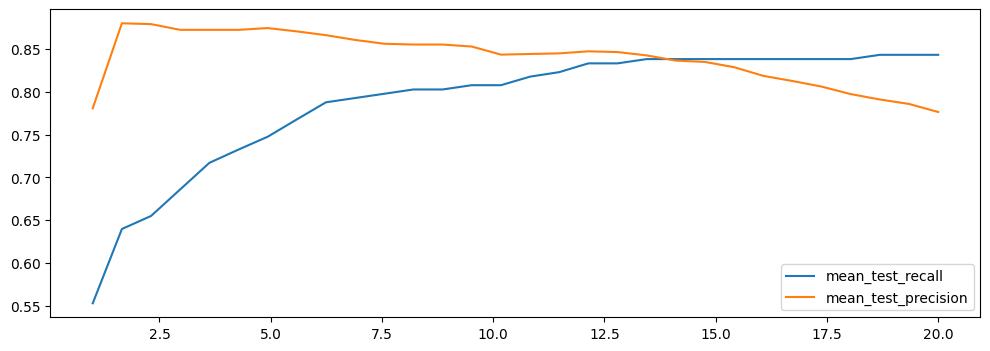

In [ ]:
# On test set

plt.figure(figsize=(12,4))
df1 = pd.DataFrame(grid3.cv_results_)

for score in ['mean_test_recall', 'mean_test_precision']:
    plt.plot([_[1] for _ in df1['param_class_weight']], 
             df1[score], 
             label = score)
    
plt.legend()
plt.show()

^ 
#### X-axis: class weights 
#### Y-axis: scores

note the precision-recall tradeoff 

Based on the priority (high precision or high recall) we must choose the weight value. Else a balanced weight might be chosen at 0:1, 1: 13 at the intersection. (F1 score)

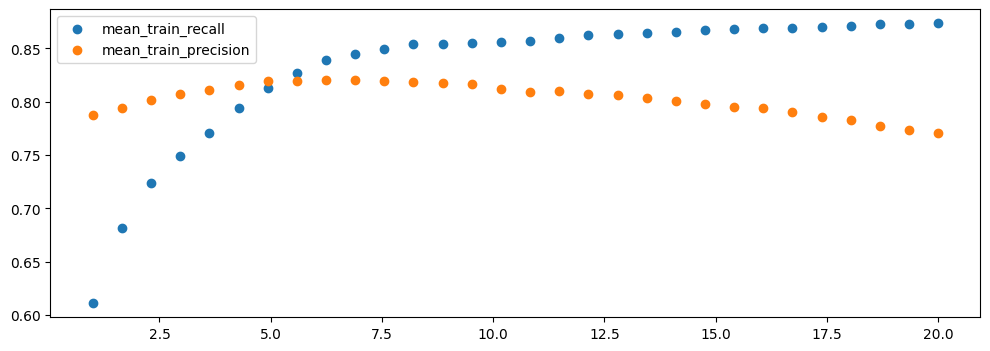

In [40]:
# on train set

plt.figure(figsize=(12,4))
df1 = pd.DataFrame(grid3.cv_results_)

for score in ['mean_train_recall', 'mean_train_precision']:
    plt.scatter([_[1] for _ in df1['param_class_weight']], 
             df1[score.replace('test', 'train')], 
             label = score)
    
plt.legend()
plt.show()

Clearly, the precision and recall curves on the train and test sets (considered during the k-fold cv) are completely different. (!!)

### Building your own metric:

In [41]:
def min_recall_precision(y_true, y_pred):

    """
    Returns the minimum out of precision and recall as our metric. 
    Maintaing the same function signature as recall_score or precision_score for simplicity. 
    Can be modified. 
    """
    recall = recall_score(y_true, y_pred)
    precision = precision_score(y_true, y_pred)
    return min(precision, recall)


grid4 = GridSearchCV(
    estimator=LogisticRegression(max_iter=1000), 
    param_grid={'class_weight': [{0:1, 1:v} for v in np.linspace(1,20,30)]}, # 30 steps between 1 to 20
    scoring={'precision': make_scorer(precision_score), 'recall':make_scorer(recall_score), 'min_both': make_scorer(min_recall_precision)},
    refit='min_both', #to rank by our custom metric
    return_train_score=True,
    cv=10
)

grid4.fit(X,y);

c:\Users\AN80050181\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\metrics\_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
c:\Users\AN80050181\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\metrics\_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))


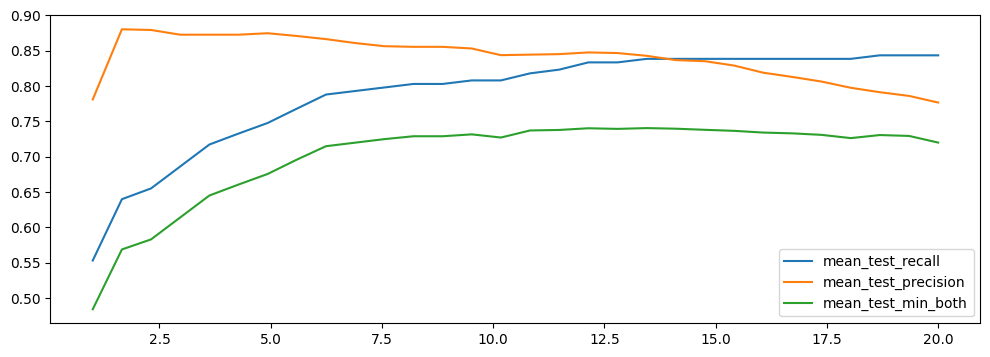

In [42]:
plt.figure(figsize=(12,4))
df2 = pd.DataFrame(grid4.cv_results_)

for score in ['mean_test_recall', 'mean_test_precision', 'mean_test_min_both']:
    plt.plot([_[1] for _ in df2['param_class_weight']], 
             df2[score], 
             label = score)
    
plt.legend()
plt.show()

### Question: 

Why is the minimum of both (green) still lesser than each precision and recall?